taught by 范志红，南京大学

In [1]:
import math,random
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb, perm
import scipy.stats as stat

In [42]:
#在场40个人，有人生日在同一天（某一天）的概率
def same_bday(n):
    total_prob=0
    for i in range(2,n+1):       
        prob_i=365*math.factorial(i)*perm(364,40-i)/math.pow(365,40)
        total_prob+=prob_i
        print("only {} people *** {:.20%}".format(i,prob_i))
    print("at least 2 people in same day--- {:.20%}".format(total_prob))

In [43]:
same_bday(40)

only 2 people *** 0.06672895103193313138%
only 3 people *** 0.00061219221130213888%
only 4 people *** 0.00000746575867441633%
only 5 people *** 0.00000011346137803064%
only 6 people *** 0.00000000206293414601%
only 7 people *** 0.00000000004362700611%
only 8 people *** 0.00000000000105125316%
only 9 people *** 0.00000000000002841225%
only 10 people *** 0.00000000000000085067%
only 11 people *** 0.00000000000000002793%
only 12 people *** 0.00000000000000000100%
only 13 people *** 0.00000000000000000004%
only 14 people *** 0.00000000000000000000%
only 15 people *** 0.00000000000000000000%
only 16 people *** 0.00000000000000000000%
only 17 people *** 0.00000000000000000000%
only 18 people *** 0.00000000000000000000%
only 19 people *** 0.00000000000000000000%
only 20 people *** 0.00000000000000000000%
only 21 people *** 0.00000000000000000000%
only 22 people *** 0.00000000000000000000%
only 23 people *** 0.00000000000000000000%
only 24 people *** 0.00000000000000000000%
only 25 people *** 

In [7]:
# 在场40个人，有人生日相同的概率
1 - comb(365,40)*perm(40,40)/math.pow(365,40)

0.8912318098179592

In [7]:
# 甲乙扔硬币，求甲的正面次数比乙多的概率
prob=0
prob2=0
for i in range(11):
    posit_jia=0
    for j in range(i+1):
        posit_jia+=comb(11,j)*math.pow(0.5,11)
    prob+=comb(10,i)*math.pow(0.5,10)*(1-posit_jia)
    prob2+=comb(10,i)*comb(11,i)*math.pow(0.5,21)
print("甲>乙 probability ", prob)
print("甲=乙 probability ", prob2)

甲>乙 probability  0.5
甲=乙 probability  0.16818809509277344


In [20]:
# Monty Hall is intuitive
def MontyHall(d_select,d_change):
    d_car=random.randint(1,3)
    if d_select==d_car and d_change==0:
        return 1
    elif d_select==d_car and d_change==1:
        return 0
    elif d_select!=d_car and d_change==0:
        return 0
    elif d_select!=d_car and d_change==1:
        return 1

In [24]:
def n_simu(n):
    win_nonchange=0
    win_change=0
    for i in range(n):
        d_select=random.randint(1,3)
        win_nonchange+=MontyHall(d_select,0)
        win_change+=MontyHall(d_select,1)
    print("改变选择，赢得概率是{:.2%}".format(win_change/n))
    print("不改变选择，赢得概率是{:.2%}".format(win_nonchange/n))

In [25]:
n_simu(100000)

不改变选择，赢得概率是33.48%
改变选择，赢得概率是66.68%


In [17]:
# 二项分布
def generate_yb(x,n,p):
    return [comb(n,i)*math.pow(p,i)*math.pow(1-p,n-i) for i in x]

In [18]:
# 泊松分布
def generate_yp(x,lam):
    return [math.pow(lam,k)*math.exp(-lam)/perm(k,k) for k in x]

In [87]:
def plot_distribution(xlim,n,p):
    x=np.arange(xlim+1)
    yb=generate_yb(x,n,p)
    plt.plot(x,yb,label="binomial p={0:.1f}".format(p))
    yp=generate_yp(x,n*p)
    plt.plot(x,yp,label="Poisson λ={0:.0f}".format(n*p))
    plt.legend()

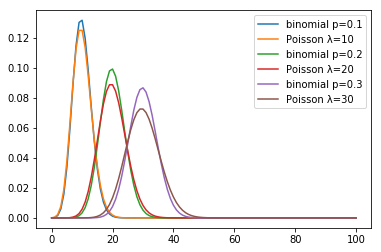

In [88]:
for p in range(1,4):
    plot_distribution(100,100,0.1*p)
plt.show()

In [8]:
# 分赌本问题模拟
def bookie(n,win1,win2):
    for i in range(2*n-win1-win2-1):
        d=random.randint(1,2)
        if d==1:
            win1+=1
        else:
            win2+=1
        if win1==n:
            return 1
        if win2==n:
            return 2

In [41]:
n=10000
win=0
for i in range(n):
    if bookie(10,5,3)==1:
        win+=1
print(win/n)

0.72605


In [36]:
# 分赌本计算，假设每一场甲乙赢得概率相等，若玩到最后，第一个人赢得概率
def bookie_prob(n,n1,n2):
    prob1=0
    for v in range(n-n1,2*n-n1-n2):
        prob1+=comb(v-1,n-n1-1)*math.pow(0.5,v)
    return prob1
# 几何分布

In [39]:
bookie_prob(10,5,3)

0.7255859375

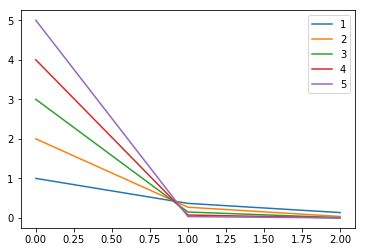

In [12]:
# exponential distribution
def exp_distribute(x,lam):
    return [lam*math.exp(-lam*i) for i in x]
x=np.arange(3)
for l in range(1,6):
    y=exp_distribute(x,l)
    plt.plot(x,y,label=l)
    plt.legend()
plt.show()

950.1555550617035 0.01941194789751982


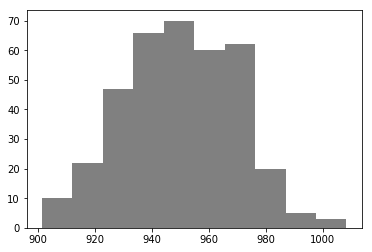

999.5467045086342 0.6975143098460286


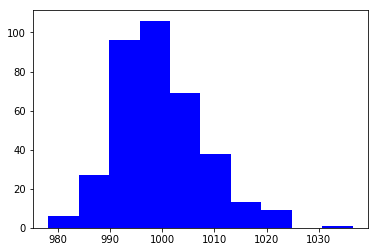

In [24]:
# 庞加莱买面包
X=stat.norm(loc=950,scale=20)
wbread=[]
wbread_max=[]
for i in range(365):
    x=X.rvs(size=100)
    wbread.append(x[0])
    wbread_max.append(max(x))
print(np.mean(wbread),stat.skew(wbread))
plt.hist(wbread,color='grey')
plt.show()
print(np.mean(wbread_max),stat.skew(wbread_max))
plt.hist(wbread_max,color="blue")
plt.show()

In [55]:
# plot distribution
from scipy.stats import binom as B
from scipy.stats import geom as G
from scipy.stats import poisson as P
from scipy.stats import norm as N
from scipy.stats import expon as E
from scipy.stats import hypergeom as H

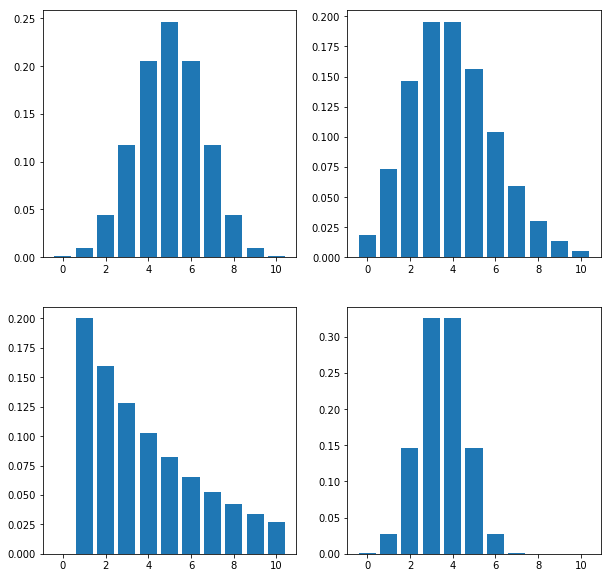

In [58]:
fig=plt.figure(figsize=(10,10))
x=np.arange(11)
# 二项分布
binomial_distribution=B(10,0.5)
y=binomial_distribution.pmf(x)
plt.subplot(221)
plt.bar(x,y)
# 泊松分布
poisson_distribution=P(4)
y=poisson_distribution.pmf(x)
plt.subplot(222)
plt.bar(x,y)
# 几何分布，失败k-1次，第k次实现
geom_distribution=G(0.2)
y=geom_distribution.pmf(x)
plt.subplot(223)
plt.bar(x,y)
# 超几何分布，共N个，特殊M个，抽n个，有m个特殊
[N, M, n] = [20, 7, 10]
hypergeom=H(N, M, n)
y=hypergeom.pmf(x)
plt.subplot(224)
plt.bar(x,y)
plt.show()

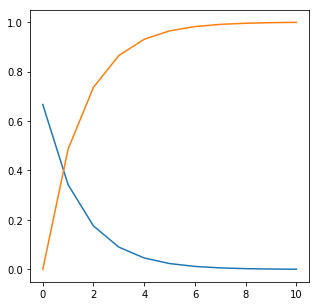

In [59]:
# 指数分布,scale为标准差
fig=plt.figure(figsize=(5,5))
x=np.arange(11)
exp_distribution=E(scale=1.5)
y=exp_distribution.pdf(x)
plt.plot(x,y)
plt.plot(x,exp_distribution.cdf(x))
plt.show()

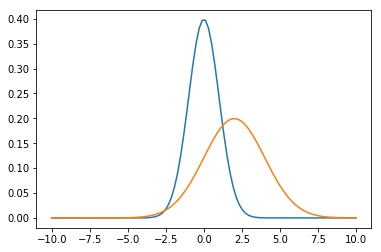

In [55]:
# 正态分布
x=np.linspace(-10,10,100)
norm_distribution=N(loc=0,scale=1)
norm_distribution2=N(loc=2,scale=2)
plt.plot(x,norm_distribution.pdf(x))
plt.plot(x,norm_distribution2.pdf(x))
plt.show()

/Users/lynn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  


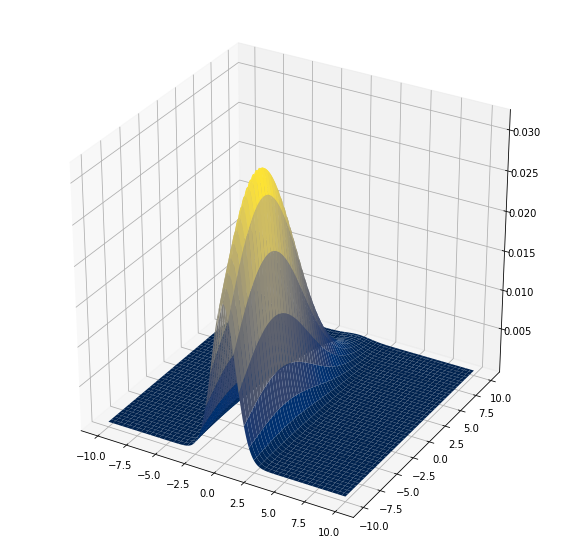

In [67]:
# 二维正态分布
from matplotlib.mlab import *
from mpl_toolkits.mplot3d import Axes3D

x=np.linspace(-10,10,200)
y=x
X,Y=meshgrid(x,y)
Z=bivariate_normal(X,Y,1,5,0,-5)
fig=figure(figsize=(10,10))
ax=fig.add_subplot(111,projection="3d")
ax.plot_surface(X,Y,Z,cmap="cividis")
plt.show()

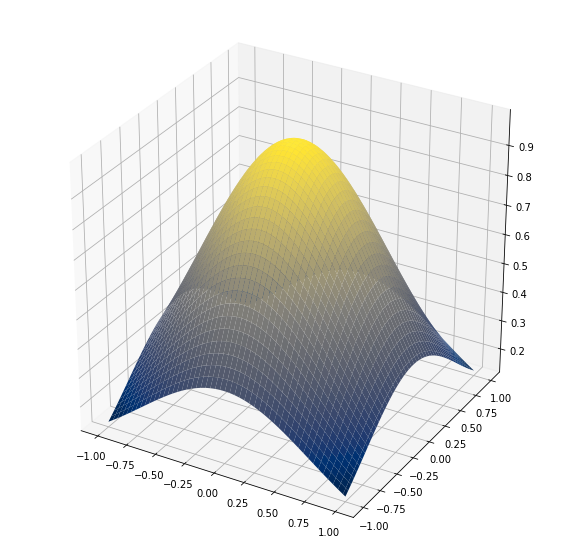

In [50]:
# 高斯积分
def f(x,y):
    return np.exp(-x**2-y**2)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
x=np.linspace(-1,1,100)
y=np.linspace(-1,1,100)
X, Y = np.meshgrid(x, y)
Z=f(X,Y)
ax.plot_surface(X,Y,Z,cmap='cividis')
plt.show()